# Gaussian Blur kernel size test

In [4]:
import random
import numpy
from datetime import datetime
from src.data.ParkingProvider import NoSpacesException, NoImageException
from src.metrics.PerformanceMetricsProviderSklearn import PerformanceMetricsProviderSklearn
from src.metrics.entity.PerformanceMetrics import PerformanceMetrics
from src.detector.entity.DetectionParams import DetectionParams
from src.data.ParkingProviderLocal import ParkingProviderLocalParams,ParkingProviderLocal
from src.app.ParkingOccupancyProcessorLocal import ParkingOccupancyProcessorLocal
from src.detector.OccupancyDetectorBorders import OccupancyDetectorBorders
import cv2 as cv

metrics_list = list()
row_names = list()
random_seed = datetime.now().timestamp
 
def test_parking(parking_id, detection_params:DetectionParams, row_name, process_batch=True):
    metrics_provider: PerformanceMetricsProviderSklearn = PerformanceMetricsProviderSklearn()

    provider_params = ParkingProviderLocalParams(
    parking_id=parking_id, path='E:\\Documents\\PKLot\\PKLot\\PKLot\\PKLot\\'+parking_id, k=4, random_seed=random_seed)
    
    processor = ParkingOccupancyProcessorLocal(
        parking_provider_params=provider_params, detection_params=detection_params, performance_metrics_provider=metrics_provider)

    if process_batch:
        try:
            detection_params.show_imshow=False
            processor.process_batch()
        except (NoSpacesException, NoImageException) as ex:
            print(f"Finished processing samples: ", ex)

    else:
        while True:
            try:
                processor.process()
            except (NoSpacesException, NoImageException) as ex:
                print(f"Finished processing samples: ", ex)
                break
        
    metrics_provider.calculate_metrics()
    metrics_provider.show_confusion_matrix()

    metrics_list.append(metrics_provider.metrics)
    row_names.append(row_name)
    
def test_gbk(parking_id, detection_params:DetectionParams, gbk_list):
    
    for gbk in gbk_list:
        
        row_name = f'{parking_id} gbk={gbk}'
        print('Testing ', row_name)
        
        detection_params.gb_k = gbk
        test_parking(parking_id, detection_params, row_name)
        
    PerformanceMetricsProviderSklearn.show_dataframe(metrics_list, row_names)
        

## UFPR04

Testing  UFPR04 gbk=None
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [03:01<00:00,  5.22it/s]


Precision: 0.951
specificity: 0.953
Recall: 0.766
F1 Score: 0.848
Accuracy: 0.852


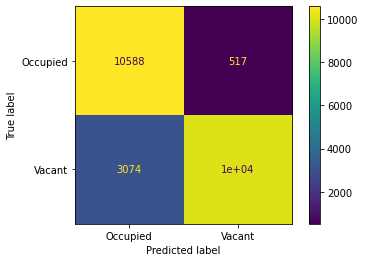

Testing  UFPR04 gbk=(3, 3)
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [02:23<00:00,  6.61it/s]


Precision: 0.949
specificity: 0.949
Recall: 0.805
F1 Score: 0.871
Accuracy: 0.871


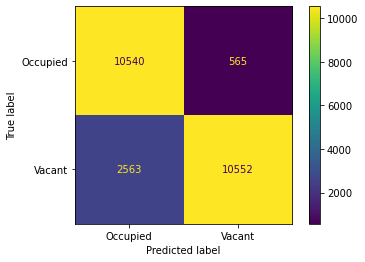

Testing  UFPR04 gbk=(5, 5)
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [01:59<00:00,  7.95it/s]


Precision: 0.942
specificity: 0.939
Recall: 0.841
F1 Score: 0.888
Accuracy: 0.886


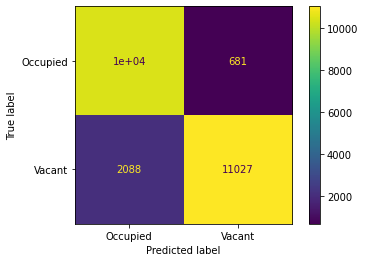

Testing  UFPR04 gbk=(7, 7)
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [01:35<00:00,  9.89it/s]


Precision: 0.927
specificity: 0.917
Recall: 0.896
F1 Score: 0.911
Accuracy: 0.905


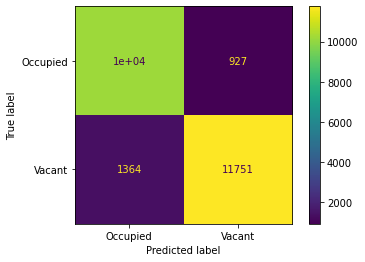

Testing  UFPR04 gbk=(9, 9)
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [01:20<00:00, 11.83it/s]


Precision: 0.912
specificity: 0.895
Recall: 0.929
F1 Score: 0.921
Accuracy: 0.913


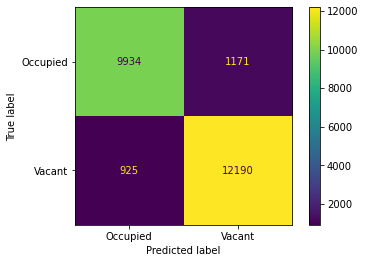

Testing  UFPR04 gbk=(13, 13)
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [00:52<00:00, 17.96it/s]


Precision: 0.865
specificity: 0.820
Recall: 0.972
F1 Score: 0.915
Accuracy: 0.903


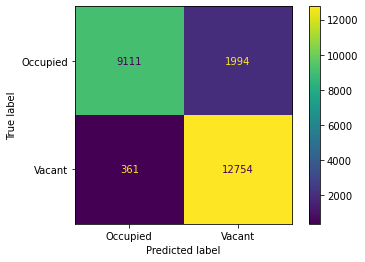

Testing  UFPR04 gbk=(21, 21)
Selected 947 files
Processing 947 files with 16 workers


100%|██████████| 947/947 [00:26<00:00, 35.97it/s]


Precision: 0.714
specificity: 0.529
Recall: 0.998
F1 Score: 0.833
Accuracy: 0.783


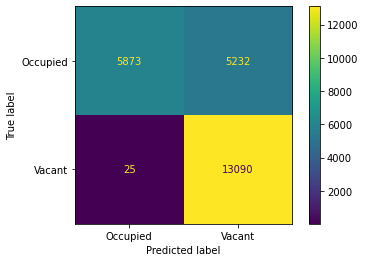

                     precision  specificity  recall     f1  accuracy
UFPR04 gbk=None          0.951        0.953   0.766  0.848     0.852
UFPR04 gbk=(3, 3)        0.949        0.949   0.805  0.871     0.871
UFPR04 gbk=(5, 5)        0.942        0.939   0.841  0.888     0.886
UFPR04 gbk=(7, 7)        0.927        0.917   0.896  0.911     0.905
UFPR04 gbk=(9, 9)        0.912        0.895   0.929  0.921     0.913
UFPR04 gbk=(13, 13)      0.865        0.820   0.972  0.915     0.903
UFPR04 gbk=(21, 21)      0.714        0.529   0.998  0.833     0.783


In [5]:
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=31, at_C=10, median_k=3, bw_size=50, vacant_threshold=0.23, show_imshow=True)  # UFPR04
test_gbk('UFPR04', PARAMS_UFPR04, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])

## UFPR05

Testing  UFPR05 gbk=None
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [03:07<00:00,  5.54it/s]


Precision: 0.864
specificity: 0.924
Recall: 0.743
F1 Score: 0.799
Accuracy: 0.853


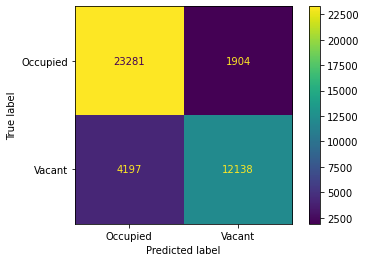

Testing  UFPR05 gbk=(3, 3)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [02:24<00:00,  7.20it/s]


Precision: 0.855
specificity: 0.914
Recall: 0.787
F1 Score: 0.819
Accuracy: 0.864


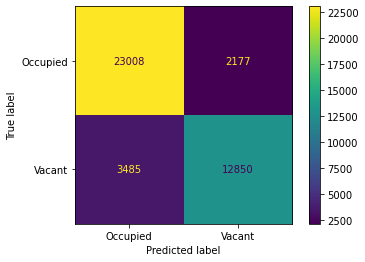

Testing  UFPR05 gbk=(5, 5)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [01:58<00:00,  8.79it/s]


Precision: 0.845
specificity: 0.902
Recall: 0.826
F1 Score: 0.835
Accuracy: 0.872


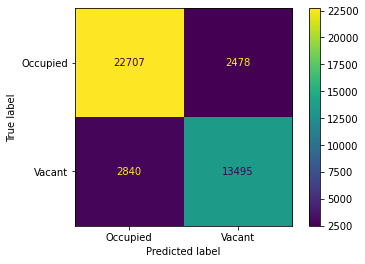

Testing  UFPR05 gbk=(7, 7)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [01:30<00:00, 11.49it/s]


Precision: 0.826
specificity: 0.879
Recall: 0.883
F1 Score: 0.853
Accuracy: 0.880


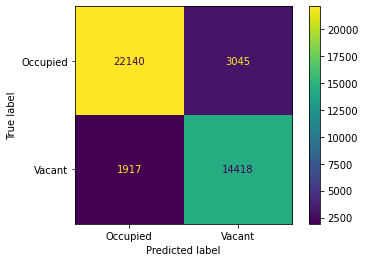

Testing  UFPR05 gbk=(9, 9)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [01:14<00:00, 13.95it/s]


Precision: 0.808
specificity: 0.858
Recall: 0.921
F1 Score: 0.861
Accuracy: 0.883


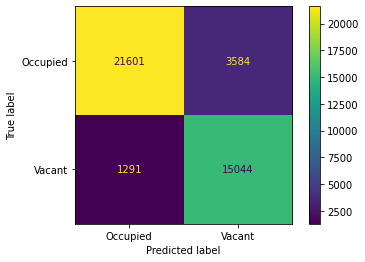

Testing  UFPR05 gbk=(13, 13)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [00:51<00:00, 20.12it/s]


Precision: 0.751
specificity: 0.792
Recall: 0.967
F1 Score: 0.845
Accuracy: 0.861


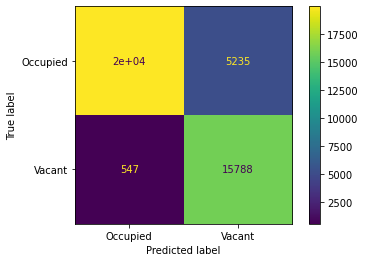

Testing  UFPR05 gbk=(21, 21)
Selected 1038 files
Processing 1038 files with 16 workers


100%|██████████| 1038/1038 [00:28<00:00, 36.61it/s]


Precision: 0.613
specificity: 0.592
Recall: 0.996
F1 Score: 0.759
Accuracy: 0.751


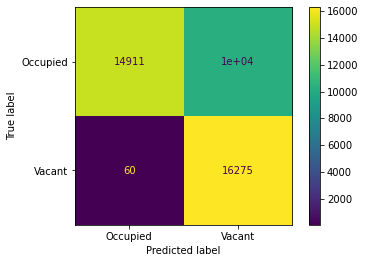

                     precision  specificity  recall     f1  accuracy
UFPR05 gbk=None          0.864        0.924   0.743  0.799     0.853
UFPR05 gbk=(3, 3)        0.855        0.914   0.787  0.819     0.864
UFPR05 gbk=(5, 5)        0.845        0.902   0.826  0.835     0.872
UFPR05 gbk=(7, 7)        0.826        0.879   0.883  0.853     0.880
UFPR05 gbk=(9, 9)        0.808        0.858   0.921  0.861     0.883
UFPR05 gbk=(13, 13)      0.751        0.792   0.967  0.845     0.861
UFPR05 gbk=(21, 21)      0.613        0.592   0.996  0.759     0.751


In [7]:
PARAMS_UFPR05 = DetectionParams(gb_k=(5, 5), gb_s=0, at_method=cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=33, at_C=7, median_k=3, bw_size=85, vacant_threshold=0.3, show_imshow=False)
metrics_list = list()
row_names = list()
test_gbk('UFPR05', PARAMS_UFPR05, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])

## PUCPR

Testing  PUCPR gbk=None
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [04:10<00:00,  4.46it/s]


Precision: 0.918
specificity: 0.915
Recall: 0.874
F1 Score: 0.896
Accuracy: 0.894


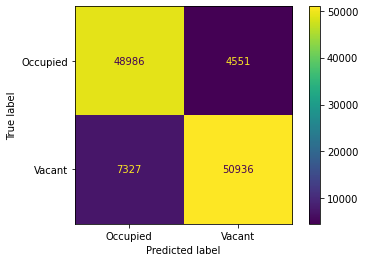

Testing  PUCPR gbk=(3, 3)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [03:21<00:00,  5.54it/s]


Precision: 0.917
specificity: 0.911
Recall: 0.895
F1 Score: 0.906
Accuracy: 0.903


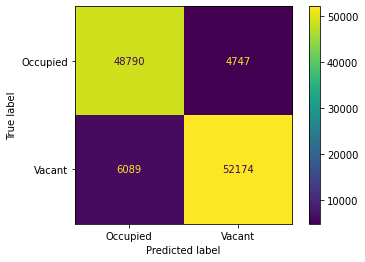

Testing  PUCPR gbk=(5, 5)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [02:52<00:00,  6.49it/s]


Precision: 0.915
specificity: 0.906
Recall: 0.921
F1 Score: 0.918
Accuracy: 0.914


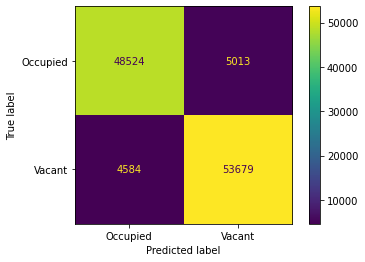

Testing  PUCPR gbk=(7, 7)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [02:16<00:00,  8.22it/s]


Precision: 0.910
specificity: 0.897
Recall: 0.957
F1 Score: 0.933
Accuracy: 0.928


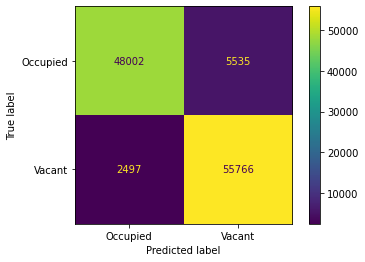

Testing  PUCPR gbk=(9, 9)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [01:54<00:00,  9.80it/s]


Precision: 0.901
specificity: 0.884
Recall: 0.973
F1 Score: 0.936
Accuracy: 0.930


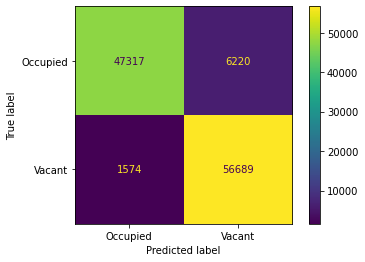

Testing  PUCPR gbk=(13, 13)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [01:18<00:00, 14.16it/s]


Precision: 0.871
specificity: 0.840
Recall: 0.990
F1 Score: 0.927
Accuracy: 0.918


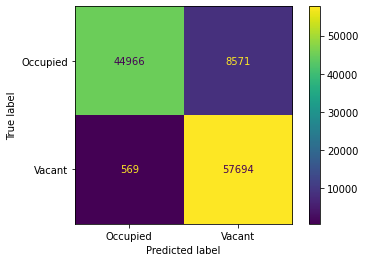

Testing  PUCPR gbk=(21, 21)
Selected 1118 files
Processing 1118 files with 16 workers


100%|██████████| 1118/1118 [00:39<00:00, 28.00it/s]


Precision: 0.755
specificity: 0.649
Recall: 0.997
F1 Score: 0.860
Accuracy: 0.830


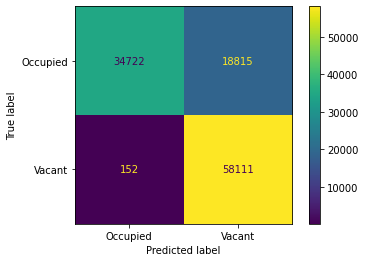

                    precision  specificity  recall     f1  accuracy
PUCPR gbk=None          0.918        0.915   0.874  0.896     0.894
PUCPR gbk=(3, 3)        0.917        0.911   0.895  0.906     0.903
PUCPR gbk=(5, 5)        0.915        0.906   0.921  0.918     0.914
PUCPR gbk=(7, 7)        0.910        0.897   0.957  0.933     0.928
PUCPR gbk=(9, 9)        0.901        0.884   0.973  0.936     0.930
PUCPR gbk=(13, 13)      0.871        0.840   0.990  0.927     0.918
PUCPR gbk=(21, 21)      0.755        0.649   0.997  0.860     0.830


In [6]:
PARAMS_PUCPR = DetectionParams(gb_k=(5, 5), gb_s=0, at_method=cv.ADAPTIVE_THRESH_GAUSSIAN_C, at_blockSize=27, at_C=7, median_k=3, bw_size=85, vacant_threshold=0.28, show_imshow=False)
metrics_list = list()
row_names = list()
test_gbk('PUCPR', PARAMS_PUCPR, [None, (3,3), (5,5), (7,7), (9,9), (13,13), (21,21)])